## Linear Regression Assignment using fundamentals.csv

### **Importing Libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv("fundamentals.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Ticker Symbol,AAL,AAL,AAL,AAL,AAP
Period Ending,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2012-12-29
Accounts Payable,3068000000.000,4975000000.000,4668000000.000,5102000000.000,2409453000.000
Accounts Receivable,-222000000,-93000000,-160000000,352000000,-89482000
Add'l income/expense items,-1961000000,-2723000000,-150000000,-708000000,600000
After Tax ROE,23,67,143,135,32
Capital Expenditures,-1888000000,-3114000000,-5311000000,-6151000000,-271182000
Capital Surplus,4695000000.000,10592000000.000,15135000000.000,11591000000.000,520215000.000
Cash Ratio,53.000,75.000,60.000,51.000,23.000


## **Data pre-processing**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   int64  
 5   Add'l income/expense items                           1781 non-null   int64  
 6   After Tax ROE                                        1781 non-null   int64  
 7   Capital Expenditures                                 1781 non-null   int64  
 8   Capital Surplus                                      1781 non-null  

In [40]:
df.duplicated().sum()

0

In [41]:
df.nunique()

Unnamed: 0                                             1781
Ticker Symbol                                           448
Period Ending                                           162
Accounts Payable                                       1676
Accounts Receivable                                    1329
Add'l income/expense items                             1134
After Tax ROE                                           154
Capital Expenditures                                   1586
Capital Surplus                                        1496
Cash Ratio                                              280
Cash and Cash Equivalents                              1697
Changes in Inventories                                  928
Common Stocks                                           972
Cost of Revenue                                        1642
Current Ratio                                           393
Deferred Asset Charges                                  714
Deferred Liability Charges              

In [42]:
df.isnull().sum()

Unnamed: 0                                               0
Ticker Symbol                                            0
Period Ending                                            0
Accounts Payable                                         0
Accounts Receivable                                      0
Add'l income/expense items                               0
After Tax ROE                                            0
Capital Expenditures                                     0
Capital Surplus                                          0
Cash Ratio                                             299
Cash and Cash Equivalents                                0
Changes in Inventories                                   0
Common Stocks                                            0
Cost of Revenue                                          0
Current Ratio                                          299
Deferred Asset Charges                                   0
Deferred Liability Charges                              

In [43]:
df.select_dtypes(include=['object'])

,Ticker Symbol,Period Ending
0,AAL,2012-12-31
1,AAL,2013-12-31
2,AAL,2014-12-31
3,AAL,2015-12-31
4,AAP,2012-12-29
5,AAP,2013-12-28
6,AAP,2015-01-03
7,AAP,2016-01-02
8,AAPL,2013-09-28
9,AAPL,2014-09-27


In [44]:
df['Ticker Symbol'].value_counts()

AAL      4
NOV      4
OMC      4
OKE      4
O        4
NWSA     4
NWS      4
NWL      4
NVDA     4
NUE      4
NTRS     4
NTAP     4
NSC      4
NLSN     4
OXY      4
NKE      4
NFX      4
NFLX     4
NEM      4
NEE      4
NDAQ     4
NBL      4
MUR      4
MU       4
MTD      4
MTB      4
ORLY     4
PAYX     4
QCOM     4
PHM      4
PWR      4
PVH      4
PSX      4
PRU      4
PPL      4
PPG      4
PNW      4
PNR      4
PNC      4
PM       4
PKI      4
PH       4
PBCT     4
PGR      4
PG       4
PFG      4
PFE      4
PEP      4
PEG      4
PDCO     4
PCLN     4
PCG      4
PCAR     4
PBI      4
MSFT     4
MRO      4
MRK      4
LB       4
LRCX     4
LOW      4
LNT      4
LMT      4
LLY      4
LLTC     4
LLL      4
LKQ      4
LH       4
LEN      4
LEG      4
KSU      4
MPC      4
KSS      4
KR       4
KORS     4
KO       4
KMX      4
KMI      4
KMB      4
KLAC     4
KIM      4
KEY      4
AAP      4
LUK      4
LUV      4
LVLT     4
LYB      4
MOS      4
MON      4
MO       4
MNST     4
MMM      4

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Ticker Symbol_int'] = labelencoder.fit_transform(df['Ticker Symbol'])

In [46]:
df=df.drop('Ticker Symbol',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Period Ending',axis=1)

In [47]:
zerocount = pd.DataFrame((df == 0).sum(),columns = ['Count'])
zerocount['difference'] = len(df)- zerocount['Count']
zerocount

,Count,difference
Accounts Payable,46,1735
Accounts Receivable,193,1588
Add'l income/expense items,305,1476
After Tax ROE,7,1774
Capital Expenditures,67,1714
Capital Surplus,257,1524
Cash Ratio,13,1768
Cash and Cash Equivalents,0,1781
Changes in Inventories,640,1141
Common Stocks,101,1680


In [48]:
zerocount.describe(percentiles = np.arange(0,1,0.1))

,Count,difference
count,77.000,77.000
mean,249.922,1531.078
std,360.954,360.954
min,0.000,271.000
0%,0.000,271.000
10%,0.000,1034.600
20%,0.000,1241.800
30%,11.200,1482.000
40%,45.400,1672.800
50%,71.000,1710.000


In [49]:
zerocount[zerocount['Count'] > 299].count()
dropping_cols = list(zerocount.index[zerocount['Count'] > 299])
df.drop(columns = dropping_cols,inplace = True)

In [50]:
len(df.columns)

55

In [51]:
dropping_cols

["Add'l income/expense items",
 'Changes in Inventories',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Effect of Exchange Rate',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Goodwill',
 'Intangible Assets',
 'Inventory',
 'Investments',
 'Long-Term Investments',
 'Minority Interest',
 'Misc. Stocks',
 'Non-Recurring Items',
 'Other Current Assets',
 'Other Current Liabilities',
 'Other Financing Activities',
 'Other Operating Items',
 'Research and Development',
 'Short-Term Debt / Current Portion of Long-Term Debt',
 'Short-Term Investments',
 'Treasury Stock']

## We are having six columns which are having missing values. so, lets replace missing values in each column with mean.

In [52]:
df.head(5).T

,0,1,2,3,4
Accounts Payable,3068000000.000,4975000000.000,4668000000.000,5102000000.000,2409453000.000
Accounts Receivable,-222000000.000,-93000000.000,-160000000.000,352000000.000,-89482000.000
After Tax ROE,23.000,67.000,143.000,135.000,32.000
Capital Expenditures,-1888000000.000,-3114000000.000,-5311000000.000,-6151000000.000,-271182000.000
Capital Surplus,4695000000.000,10592000000.000,15135000000.000,11591000000.000,520215000.000
Cash Ratio,53.000,75.000,60.000,51.000,23.000
Cash and Cash Equivalents,1330000000.000,2175000000.000,1768000000.000,1085000000.000,598111000.000
Common Stocks,127000000.000,5000000.000,7000000.000,6000000.000,7000.000
Cost of Revenue,10499000000.000,11019000000.000,15620000000.000,11096000000.000,3106967000.000
Current Ratio,78.000,104.000,88.000,73.000,124.000


In [53]:
df['Cash Ratio'].fillna(int(df['Cash Ratio'].mean()), inplace=True)
df['Current Ratio'].fillna(int(df['Current Ratio'].mean()), inplace=True)
df['Quick Ratio'].fillna(int(df['Quick Ratio'].mean()), inplace=True)
df['For Year'].fillna(int(df['For Year'].mean()), inplace=True)
df['Earnings Per Share'].fillna(int(df['Earnings Per Share'].mean()), inplace=True)
df['Estimated Shares Outstanding'].fillna(int(df['Estimated Shares Outstanding'].mean()), inplace=True)

In [54]:
df.isnull().sum()

Accounts Payable                                0
Accounts Receivable                             0
After Tax ROE                                   0
Capital Expenditures                            0
Capital Surplus                                 0
Cash Ratio                                      0
Cash and Cash Equivalents                       0
Common Stocks                                   0
Cost of Revenue                                 0
Current Ratio                                   0
Depreciation                                    0
Earnings Before Interest and Tax                0
Earnings Before Tax                             0
Fixed Assets                                    0
Gross Margin                                    0
Gross Profit                                    0
Income Tax                                      0
Interest Expense                                0
Liabilities                                     0
Long-Term Debt                                  0


In [55]:
df.describe().round(2)

,Accounts Payable,Accounts Receivable,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Common Stocks,Cost of Revenue,Current Ratio,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Fixed Assets,Gross Margin,Gross Profit,Income Tax,Interest Expense,Liabilities,Long-Term Debt,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Operating Income,Operating Margin,Other Assets,Other Equity,Other Investing Activities,Other Liabilities,Other Operating Activities,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,For Year,Earnings Per Share,Estimated Shares Outstanding,Ticker Symbol_int
count,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000
mean,4673264471.080,-63534842.220,43.600,-1251924663.110,5351306011.790,74.380,8521030522.180,1608018042.670,12350202618.190,186.640,1084239005.610,2710101856.260,2375332563.170,8534472475.010,46.760,7188351736.660,669390312.180,326271202.130,178972134.190,8478586676.590,515541227.960,52732548.570,3257652236.380,-457764166.760,-2717610688.940,1705516588.990,219845736.100,1687810053.900,1748058844.470,3242125638.970,2268979510.950,18.180,4860465818.640,-620754596.290,-405414057.830,9076376033.130,7145331.270,17.750,59.640,13.960,146.790,9206834916.340,-765204288.600,3980865752.950,55697601169.010,6726623719.820,4699918938.800,11888692581.130,43800576405.390,55681051979.790,20291936119.600,2013.280,3.310,602424367.570,223.520
std,14058043957.060,756279433.680,233.920,2979962962.670,11335484517.480,93.310,54323974302.880,9168882774.900,30405276657.620,116.820,2188299769.330,6145345176.310,5720792317.190,19289448316.980,25.440,13601675596.270,1830139885.230,1054265503.110,2379558661.010,27516656154.230,5384719995.540,2270116933.460,7397937239.120,9058323220.800,10604756857.390,3993400735.180,2663623443.590,3956990599.700,4334860172.940,7654601648.010,5061444138.510,20.500,25181214076.510,3053672302.210,3187636639.870,53424500494.200,3291367878.710,21.380,330.450,17.560,108.200,25476221586.700,2747835966.920,9065382814.850,203260034457.240,13451193667.430,9538832077.250,25844862492.200,181669838745.000,203262317875.430,40958238670.340,18.960,4.400,1069990295.820,129.380
min,0.000,-6452000000.000,0.000,-37985000000.000,-721500000.000,0.000,21000.000,0.000,0.000,17.000,-448000000.000,-27927000000.000,-28226000000.000,0.000,0.000,-12647000000.000,-8013000000.000,0.000,-40168000000.000,0.000,-99088000000.000,-42930000000.000,-16056000000.000,-188000000000.000,-166000000000.000,-23528000000.000,-58098000000.000,-23119000000.000,-22757000000.000,0.000,-27910000000.000,0.000,0.000,-29607000000.000,-56717000000.000,0.000,-33666000000.000,0.000,0.000,0.000,10.000,-19900545000.000,-58852000000.000,-487000000.000,2705000.000,0.000,0.000,-13244000000.000,2577000.000,2705000.000,1514000.000,1215.000,-61.200,-1513945000.000,0.000
25%,516000000.000,-104000000.000,10.000,-1151200000.000,479100000.000,21.000,308800000.000,1628000.000,1194400000.000,118.000,179900000.000,585163000.000,490000000.000,592000000.000,29.000,1581900000.000,103000000.000,30050000.000,-54844000.000,1107448000.000,-73400000.000,-155000000.000,664175000.000,-1091886000.000,-229600000

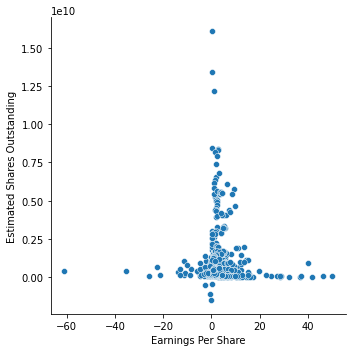

In [60]:
sns.relplot(x="Earnings Per Share", y="Estimated Shares Outstanding", data=df);

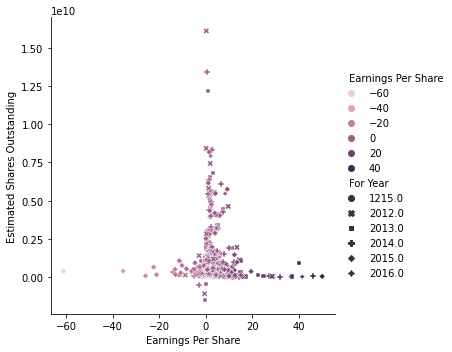

In [64]:
sns.relplot(x="Earnings Per Share", y="Estimated Shares Outstanding",hue="Earnings Per Share",style="For Year",data=df)

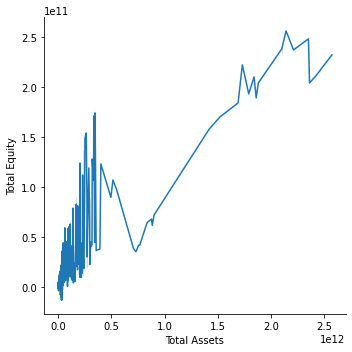

In [65]:
sns.relplot(x="Total Assets", y="Total Equity", kind="line", data=df);

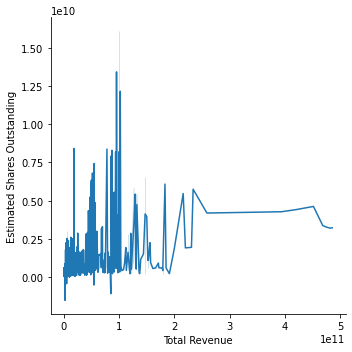

In [66]:
sns.relplot(x="Total Revenue", y="Estimated Shares Outstanding", kind="line", data=df);

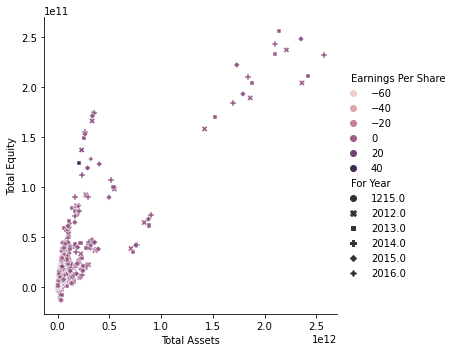

In [67]:
sns.relplot(x="Total Assets", y="Total Equity",hue="Earnings Per Share",style="For Year",data=df)

In [68]:
y= df.pop('Estimated Shares Outstanding')
x= df

In [69]:
x.shape

(1781, 54)

In [70]:
y.shape

(1781,)

# splitting data into train and test data

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [72]:
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (1424, 54)
Testing data shape:  (357, 54)


In [73]:
print("Dependent variable training: ", Y_train.shape)
print("Dependent variable testing: ", Y_test.shape)

Dependent variable training:  (1424,)
Dependent variable testing:  (357,)


In [74]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [79]:
pred=regression.predict(X_test)

In [80]:
regression.score(X_train,Y_train)

0.842712163634863

In [81]:
regression.score(X_test,Y_test)

0.25906858427826607

In [82]:
corr_matrix = np.corrcoef(Y_test,pred)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.3796419011454332
